In [1]:
using QuantumOptics
using SparseArrays
using Plots
using LinearAlgebra
using ProgressMeter
using Revise
using OffsetArrays
using Interpolations
using LaTeXStrings
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("Hofstadter_SP.jl")
includet("../Scripts/Impurity.jl")
includet("../Scripts/Braiding.jl")

In [28]:
Nx = 4
Ny = 4
p = 1
q = 2
pn = 3
U = 10 
V = 10
NPin = 2

N = Nx*Ny
NPhi0 = Int(Nx*Ny*(p/q))
PN = vcat( ( [i] for i in 0:pn) ... )
Cut_Off = NPhi0

8

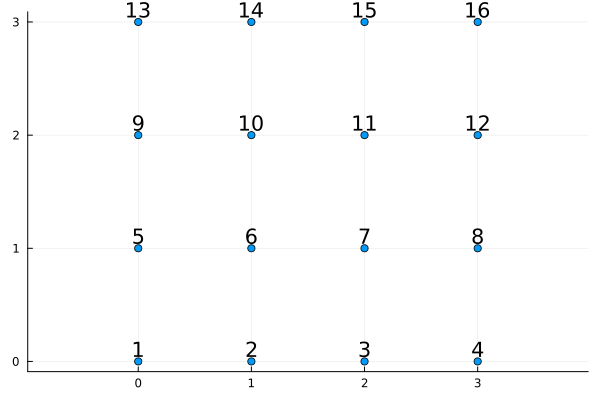

([0 0; 1 0; … ; 2 3; 3 3], nothing)

In [29]:
co, _ = plot_square_lattice(N, Nx, Ny)

In [30]:
# H_Hubbard_Projection() #
matrix = Hofstadter_SP(Nx, Ny, p/q ,0)
basis_sp = NLevelBasis(N)
basis_cut_sp = NLevelBasis(Cut_Off)
H = Sp_Op(basis_sp, matrix)
H_sp_Sub, Sub_Basis, P, Pt = H_sub(basis_sp, H, Cut_Off)
HardCore = false
basis_cut_mb = get_Bosonic_MB_Basis(Sub_Basis, pn, HardCore)
H_MB_sub = get_mb_op(basis_cut_mb, H_sp_Sub)
basis_mb_sub = boson_mb_basis(Sub_Basis, pn, HardCore)
H_Int = Hubbard_Interaction_fixed_prtcl(basis_sp)
H_Int_Sub = Hubbard_Int_fixed_prtc_sub(H_Int, P, Pt, Sub_Basis, basis_mb_sub)
HTotalSub = H_MB_sub + H_Int_Sub 

num_sub_list = get_num_sub_list(N, P, Pt)
Sub_Number_MB_Operator_List = get_num_mb_op(N, basis_cut_sp, num_sub_list, basis_cut_mb)

V0 = [V, V]; Imp_Site = [13, 7]
Impurity_Data = Impurity(V0, Imp_Site)
ParameterInfo(NPin, pn, Nx, Ny, p, q) 

Lattice: 4x4
The Number of Flux per Unit-Cell (ϕ) = 1//2
Filling Fraction (ν) = 3//8 (The Number of Quasiholes = 2)
The Number of Flux Quanta = 6 (Delocalised Number = 0)
The Total Number of Particle = 3
The Number of State of Ground Degeneracy = 2


In [31]:
Impurity_H = Imp_H(HTotalSub, Sub_Number_MB_Operator_List, Impurity_Data);

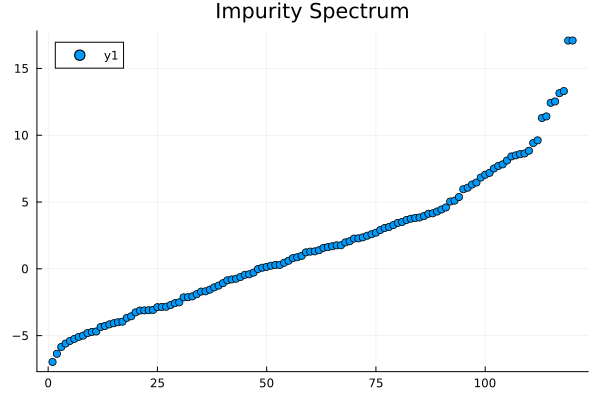

In [32]:
ϵ, λ = eigenstates(Impurity_H)
scatter(ϵ, title="Impurity Spectrum")

In [26]:
#ϵ_fixed, λ_fixed =  fixed_pn_sector(pn, ϵ, λ, basis_cut_mb);
#scatter(ϵ_fixed, title="Fixed Particle Sector Spectrum") 

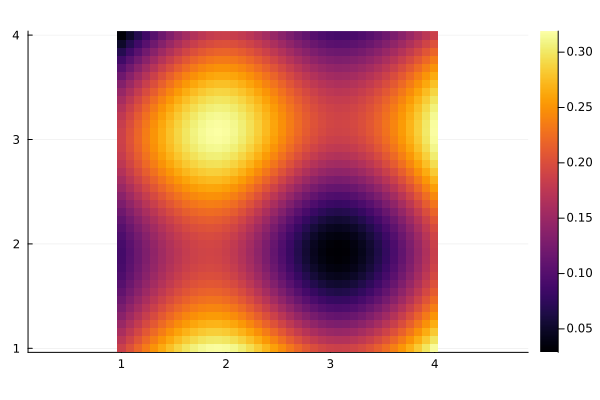

In [27]:
factor = 10
Degeneracy, _, _, _ = ground_degeneracy(Nx, Ny, p, q, NPin, pn)
plot_density(Nx, Ny, Degeneracy, N, Sub_Number_MB_Operator_List, basis_cut_mb, λ, factor)

In [10]:
start_point_1 = Impurity_Data.Imp_Site[1]
lens_1 = [4, 4, 4, 4]
dirs_1 = [1, Nx, -1, -Nx]
#lens_1 = [5, 5]
#dirs_1 = [1, Ny]
rec_path_1 = rectangular_path(start_point_1,lens_1,dirs_1)
#rec_path_1 = reverse(rec_path_1)

17-element Vector{Int64}:
 21
 22
 23
 24
 25
 34
 43
 52
 61
 60
 59
 58
 57
 48
 39
 30
 21

In [11]:
start_point_2 = Impurity_Data.Imp_Site[2]
lens_2 = [4, 4, 4, 4]
dirs_2 = [-1, -Nx, 1, Nx]
#lens_2 = [5, 5]
#dirs_2 = [-1, -Ny] 
rec_path_2 = rectangular_path(start_point_2,lens_2,dirs_2)
#rec_path_2 = reverse(rec_path_2)

17-element Vector{Int64}:
 61
 60
 59
 58
 57
 48
 39
 30
 21
 22
 23
 24
 25
 34
 43
 52
 61

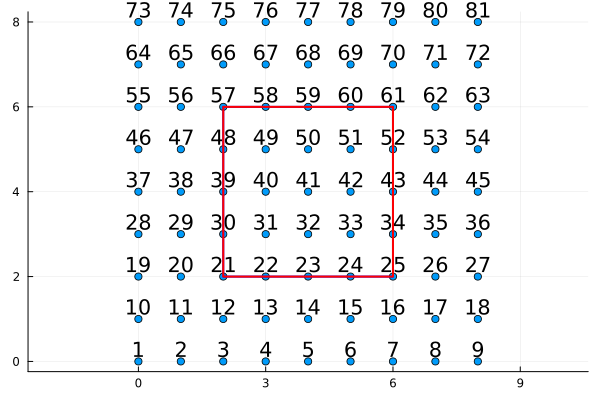

In [12]:
plot_paths(co, rec_path_1, rec_path_2)

In [25]:
STEP = 0:0.007:1
ψ, ψ_list, ψ_first, ψ_tilde_list, A_inv_list, A_list, E_list = get_phases(Impurity_Data, rec_path_1, rec_path_2, basis_cut_mb, STEP, H_Total, Sub_Number_MB_Operator_List, Degeneracy);

In [14]:
E_Split_List, δ_List = LaughlinDegeneracyBreaking(STEP);

BoundsError: BoundsError: attempt to access 2-element Vector{Float64} at index [3]

In [15]:
plot(E_Split_List, title=L"E_{split} = E_2^{Laughlin} - E_1^{Laughlin}", xlabel=L"n", ylabel=L"E_{split}", legend=false)

UndefVarError: UndefVarError: `E_Split_List` not defined

In [16]:
plot(δ_List, title=L"δ = E_{split} / Δ", xlabel=L"n", ylabel=L"δ", legend=false)

UndefVarError: UndefVarError: `δ_List` not defined

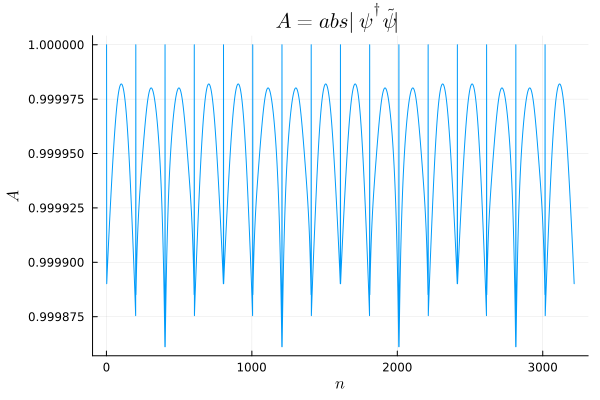

In [14]:
plot(abs.(det.(A_list)), title=L"A = abs|ψ^{†} \tilde{\psi}|", xlabel=L"n", ylabel=L"A", legend=false)

In [15]:
BerryMatrix(ψ,ψ_first) = ψ'ψ_first

BerryMatrix (generic function with 1 method)

In [16]:
BerryM = BerryMatrix(ψ,ψ_first)
BerryM'-BerryM

7×7 Matrix{ComplexF64}:
          0.0+1.24901im      …      0.156761+0.413653im
 -6.02914e-11-7.47014e-12im     -2.44668e-12-1.01431e-12im
    -0.143948+0.0700746im         -0.0234214+0.0248647im
      0.25666-0.139003im            -0.44274+0.512818im
  1.52845e-10-3.71043e-10im      6.32723e-12+7.88619e-10im
   5.6604e-11-3.42998e-11im  …   5.46599e-11+3.40089e-11im
    -0.156761+0.413653im                 0.0+0.927783im

In [17]:
det(BerryM)

-0.9984806102663155 - 0.05510418243842968im

In [18]:
BerryE, Berryλ = eigen(BerryM);
BerryE

7-element Vector{ComplexF64}:
 -0.9999976404111417 + 0.0021723655651604743im
 -0.9967655192704418 + 0.08036479075768806im
 -0.9227516635420131 - 0.385395079665592im
 -0.7431238559683339 - 0.6691538946242155im
 -0.4947710342074079 - 0.8690233735115139im
 0.37778582915755515 - 0.9258930107132999im
  0.6518446831640717 - 0.758352496554689im

In [19]:
Phases(BerryE) = log.(BerryE)./(im*2*pi)

Phases (generic function with 1 method)

In [24]:
Phases(BerryE)

7-element Vector{ComplexF64}:
    0.499654257010165 + 1.9974316299794728e-17im
  0.48719573827532814 - 3.230250848361383e-17im
  -0.4370325847819293 - 4.417437057588216e-17im
 -0.38332834575256336 - 5.742668174864681e-17im
 -0.33237403669049126 - 2.2087185287941084e-17im
   -0.188342780309625 - 2.4295903816735195e-17im
 -0.13699770029469052 + 1.1043592643970552e-16im